In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(sum(map(ord, "palettes")))
sns.set()
sns.set_style("darkgrid")

In [50]:
with np.load('results_0.npz') as f:
    print (f.keys())

['d_logits', 's_logits', 'lbls', 'adv_sup_acc', 'adv_sup_acc_unf', 'correct_uncertainty', 'incorrect_uncertainty', 'adv_acc']


In [70]:
def detection(prob_vec):
    return int(np.exp(prob_vec[0])/np.sum(np.exp(prob_vec)) >= 0.5)

In [71]:
def true_positive(prob_vec, label):
    return int(np.argmax(prob_vec[1:]) == np.argmax(label))

In [72]:
adv_sup_accs = []
adv_sup_accs_unf = []
s_accs = []
d_accs = []
class_0_prob_on_correct = []
class_0_prob_on_incorrect = []
adv_accs = []
detection_on_real = []
for i in range(0,2000,100):
    with np.load('results_'+str(i)+'.npz') as f:
        adv_sup_accs.append(f['adv_sup_acc'])
        adv_sup_accs_unf.append(f['adv_sup_acc_unf'])
        
        s_results = np.array([true_positive(p,l) for (p,l) in zip(f['s_logits'], f['lbls'])])
        d_results = np.array([true_positive(p,l) for (p,l) in zip(f['d_logits'], f['lbls'])])
    
        s_accs.append((s_results[s_results>0]).shape[0]/s_results.shape[0])
        d_accs.append((d_results[d_results>0]).shape[0]/d_results.shape[0])
    
        detect_on_real_results = np.array([detection(p) for p in f['d_logits']])
        
        print(f['d_logits'][0])
    
        class_0_prob_on_correct.append(f['correct_uncertainty'])
        class_0_prob_on_incorrect.append(f['incorrect_uncertainty'])
        adv_accs.append(f['adv_acc'])
        detection_on_real.append(detect_on_real_results[detect_on_real_results>0].shape[0]/detect_on_real_results.shape[0])

[ 13.45089626  -4.12770081   0.21112216  -3.67567301  -1.61420572
  -3.52154446  -5.3479805   -4.40579081   3.37333822  -4.01144886
  -1.64259744]
[ 15.2192564   -0.15364833  -2.27953053  -0.41754502  -4.132792
  -0.37299538  -4.00914431 -13.17529011  23.24066925  -0.77959317
  10.11491013]
[ 15.10406494   1.3967942    1.89997232   4.8276372   -2.32627439
  -2.30215836   4.68239594 -15.56972504  22.049757     0.77042609
   3.37934971]
[ 15.6929512   -0.92418021  -3.88996959   5.76594973   1.41516566
   2.85695076   1.57832575 -11.56806278  17.79582405   2.10197711
   5.21583796]
[ 14.8859396   -6.70838594  -1.72805524   5.53761339   3.88215423
   0.31766906   1.99609339 -15.51094151  21.25045395   5.50276136
  11.85085297]
[ 13.58454323  -3.71616197  -1.50659013   8.20728397   3.66938138
  -2.16989684  -2.01572657 -14.48431587  21.90392685   3.88774776
   4.85947752]
[ 19.04917336  -7.5562005   -1.51472986   6.72859478   0.66962004
  -3.88100243  -2.34143782 -15.6709013   25.51925278  

In [73]:
x = range(1,21)

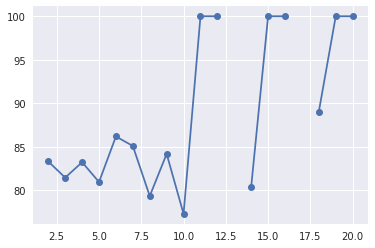

In [74]:
plt.plot(x,adv_sup_accs,'o-')

(0, 100)

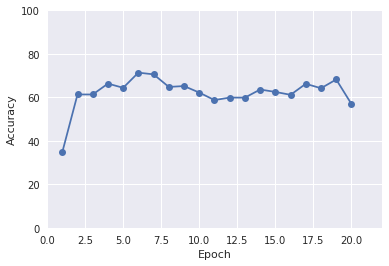

In [75]:
plt.plot(x,adv_sup_accs_unf,'o-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0,22])
plt.ylim([0,100])

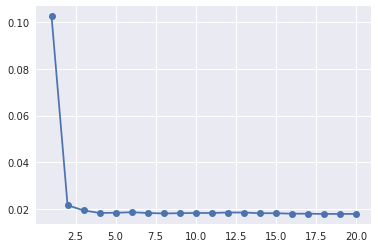

In [76]:
plt.plot(x,s_accs,'o-')

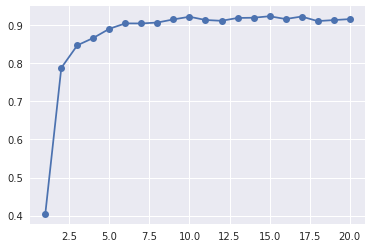

In [77]:
plt.plot(x,d_accs,'o-')

In [78]:
d_accs[-1]

0.9161658653846154

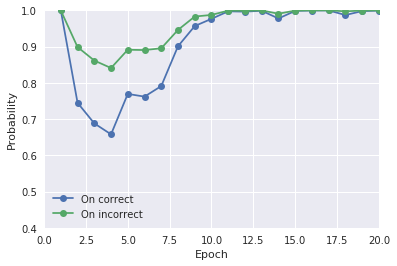

In [79]:
plt.plot(x,class_0_prob_on_correct,'o-',label='On correct')
plt.plot(x,class_0_prob_on_incorrect,'o-',label='On incorrect' )
plt.xlabel('Epoch')
plt.ylabel('Probability')
plt.xlim([0,20])
plt.ylim([0.4,1])
plt.legend()

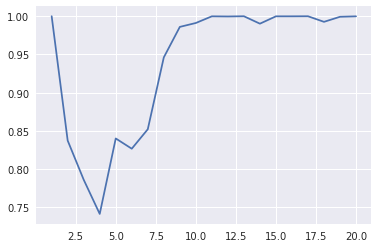

In [80]:
plt.plot(x, 1-np.array(adv_accs))

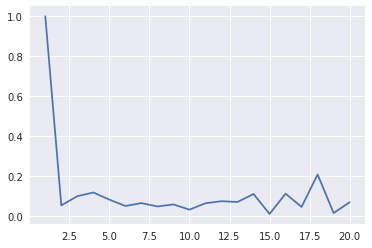

In [81]:
plt.plot(x, detection_on_real)